In [1]:
%matplotlib ipympl
import seaborn as sns
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

In [2]:
# Cargar el dataset Titanic de Seaborn
data = sns.load_dataset('titanic')

# Convertir algunas variables en categorías
data['class'] = data['class'].astype(str)
data['alone'] = data['alone'].astype(str)
data['adult_male'] = data['adult_male'].astype(str)

In [3]:
# Selección de algunas columnas y transformación a formato de transacción
transactions = data.applymap(str).values.tolist()

# Transformación con One-Hot Encoding
te = TransactionEncoder()
oht = te.fit(transactions).transform(transactions)
df = pd.DataFrame(oht, columns=te.columns_)


/tmp/ipykernel_116658/2449374460.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  transactions = data.applymap(str).values.tolist()


In [4]:
# Minería de ítems frecuentes
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)

# Minería de reglas de asociación
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)


In [5]:
def onclick(event):
    # Obtener el índice del punto más cercano al clic
    idx = event.ind[0]

    # Extraer la regla correspondiente a ese índice
    rule = rules.iloc[idx]
    antecedents = ', '.join(list(rule['antecedents']))
    consequents = ', '.join(list(rule['consequents']))

    # Mostrar la regla en el notebook
    display(Markdown(f"**Regla:** {antecedents} -> {consequents}"))
    display(Markdown(f"**Lift:** {rule['lift']:.2f}, **Confianza:** {rule['confidence']:.2f}"))

/home/mier/.local/lib/python3.12/site-packages/traitlets/traitlets.py:1387: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  warn(


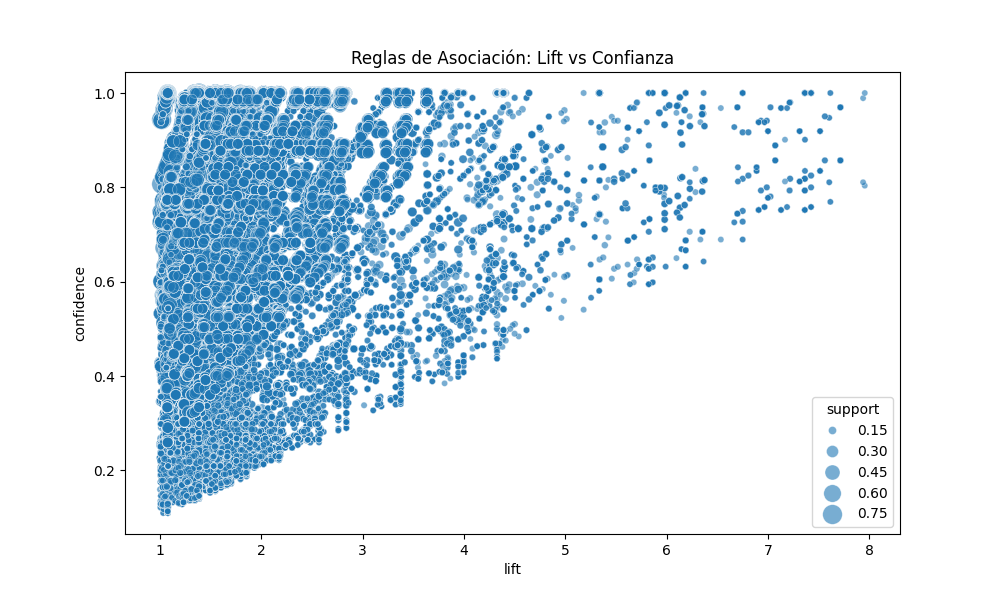

**Regla:** Second, 1 -> S, False

**Lift:** 2.22, **Confianza:** 0.80

**Regla:** True, female -> nan, 0, False

**Lift:** 2.18, **Confianza:** 0.75

**Regla:** female, 1 -> yes, 0

**Lift:** 2.27, **Confianza:** 0.71

**Regla:** S, female -> 2, False

**Lift:** 2.26, **Confianza:** 0.49

**Regla:** S, 1 -> Southampton, woman

**Lift:** 2.17, **Confianza:** 0.42

**Regla:** yes, 0 -> nan, woman, 1

**Lift:** 2.25, **Confianza:** 0.39

**Regla:** yes, 0 -> nan, woman, 1

**Lift:** 2.25, **Confianza:** 0.39

**Regla:** no -> male

**Lift:** 1.32, **Confianza:** 0.85

**Regla:** yes -> False

**Lift:** 1.51, **Confianza:** 0.81

**Regla:** male -> nan, man

**Lift:** 1.54, **Confianza:** 0.78

**Regla:** First -> yes, 0

**Lift:** 1.74, **Confianza:** 0.55

In [ ]:
# Crear el scatter plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=rules, x="lift", y="confidence", alpha=0.6, size="support", sizes=(20, 200), ax=ax, picker=4)
plt.title("Reglas de Asociación: Lift vs Confianza")

# Conectar el evento de clic con la función onclick
fig.canvas.mpl_connect('pick_event', onclick)

plt.show()
